In [1]:
import numpy as np
from scipy.integrate import odeint

# Define the ODE dy/dt = -2*y*t
def function(y, t):
    dydt = -2 * y * t
    return dydt

# Set initial condition and time points
y0 = 1  # Initial condition: y(0) = 1
t = np.linspace(0, 2, 100)  # Time points from 0 to 2

# Solve the ODE using odeint
solution = odeint(function, y0, t)

# Find the value of y when t = 1
t_to_find = 1
index_t_to_find = np.argmin(np.abs(t - t_to_find))
y_at_t1 = solution[index_t_to_find]

print(f'The value of y at t = 1 is: {y_at_t1}')

The value of y at t = 1 is: [0.37534872]


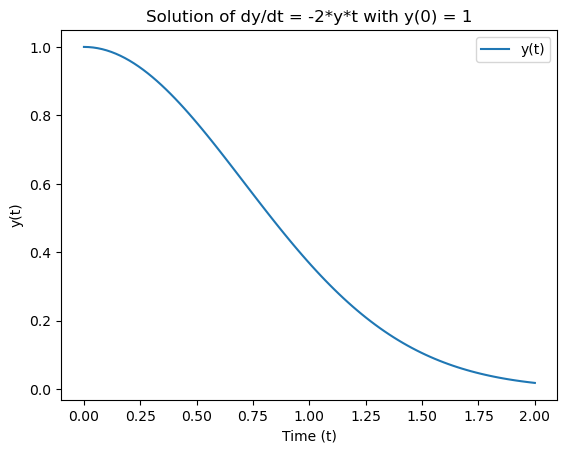

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE dy/dt = -2*y*t
def function(y, t):
    dydt = -2 * y * t
    return dydt

# Set initial condition and time points
y0 = 1  # Initial condition: y(0) = 1
t = np.linspace(0, 2, 100)  # Time points from 0 to 2

# Solve the ODE using odeint
solution = odeint(function, y0, t)

# Plot the solution
plt.plot(t, solution, label='y(t)')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2*y*t with y(0) = 1')
plt.legend()
plt.show()

In [3]:
# Import necessary libraries
import numpy as np

# Define the coefficient matrix A
A = np.array([[2, 4, 6], [5, 3, 2], [7, 8, 9]])
print(A)

# Define the right-hand side vector B
B = np.array([[18], [13], [30]])
print(B)

# Calculate the inverse of A and multiply by b to find the solution vector
# linalg=linear algebra
C = np.linalg.inv(A).dot(B)
print(C)
# C is the solution vector

[[2 4 6]
 [5 3 2]
 [7 8 9]]
[[18]
 [13]
 [30]]
[[ 4.5]
 [-7.5]
 [ 6.5]]


In [7]:
import requests
import matplotlib.pyplot as plt

def get_weather_data(latitude, longitude, forecast_days, max_retries=3):
    # Define API endpoint and parameters
    api_url = "https://api.open-meteo.com/v1/forecast?latitude=2.5&&longitude=112.5&hourly=temperature_2m&timezone=Asia%2FSingapore&forecast_days=1"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "hourly": "temperature_2m",
        "timezone": "Asia/Singapore",
        "forecast_days": forecast_days
    }

    # Attempt the API request with retries
    for attempt in range(max_retries):
        response = requests.get(api_url, params=params)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Error: Unable to retrieve weather data. Status Code: {response.status_code}")

        # Retry after a short delay
        if attempt < max_retries - 1:
            print(f"Retrying... (Attempt {attempt + 2}/{max_retries})")
            time.sleep(2)  # You may need to import the time module

    return None

def plot_temperature_trend(data, forecast_days):
    # Check if the expected structure is present in the API response
    if 'hourly' in data and 'temperature_2m' in data['hourly']:
        hourly_data = data['hourly']['temperature_2m']

        # Ensure that hourly_data is a list
        if isinstance(hourly_data, list):
            # Create lists for time and temperature
            time_points = []
            temperatures = []

            # Check and extract data from each entry
            for entry in hourly_data:
                if isinstance(entry, dict) and 'timestamp' in entry and 'value' in entry:
                    time_points.append(entry['timestamp'])
                    temperatures.append(entry['value'])
                else:
                    print("Error: Unexpected format in hourly_data entry. Skipping.")

            # Convert time points to hours for better readability
            hours = [(time - data['timezone_offset']) % 86400 / 3600 for time in time_points]

            # Plot the temperature trend
            plt.figure(figsize=(10, 6))
            plt.plot(hours, temperatures, label=f"{forecast_days} Day Forecast")
            plt.xlabel('Hour of the Day')
            plt.ylabel('Temperature (°C)')
            plt.title(f'Temperature Trend ({forecast_days} Day Forecast) - Latitude: {data["latitude"]}, Longitude: {data["longitude"]}, Elevation: {data["elevation"]}m')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print("Error: Unexpected response. 'temperature_2m' should be a list.")
    else:
        print("Error: Unexpected response. Unable to extract hourly temperature data.")

def main():
    # Get user input for forecast days
    while True:
        try:
            forecast_days = int(input("Enter the number of forecast days (1 to 16): "))
            if 1 <= forecast_days <= 16:
                break
            else:
                print("Invalid input. Please enter a number within 1 and 16.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")

    # Specify location coordinates
    latitude = 2.375
    longitude = 112.5

    # Get weather data from the API
    weather_data = get_weather_data(latitude, longitude, forecast_days)

    if weather_data:
        # Plot the graph of temperature trend
        plot_temperature_trend(weather_data, forecast_days)

if __name__ == "__main__":
    main()

Enter the number of forecast days (1 to 16): 2
Error: Unexpected response. Unable to extract hourly temperature data.
